# PIK3CA: Effects of Mutation on ARID1A

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data </b>

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and AKT1 proteome abundance 

### Perform a t-test with mutated and non-mutated protein levels

In [4]:
protList = ['ARID1A']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

proteomics = proteomics[:100]

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

 ### We can now plot the data 

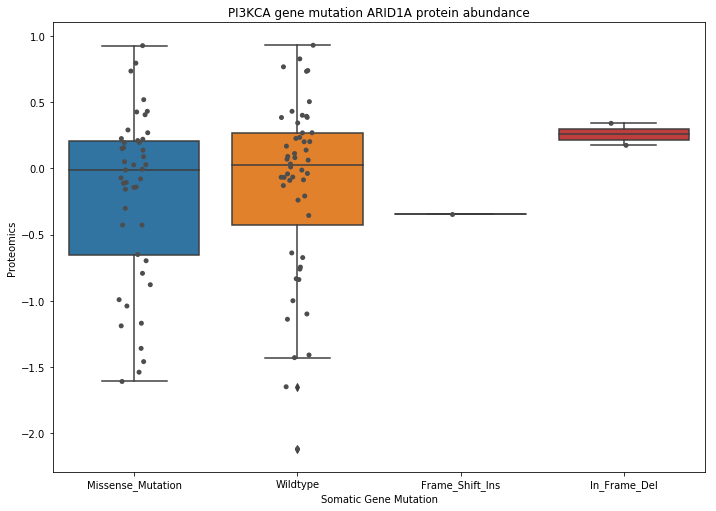

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='ARID1A', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation ARID1A protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='ARID1A',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and ARID1A phosphoproteome abundance 

In [6]:
#phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
#print(phosphositesdf)

phosphositesdf = CPTAC.compare_mutations(phos, 'AKT1-S122', gene)
print(phosphositesdf)

      AKT1-S122           Mutation Patient_Type
S001        NaN  Missense_Mutation        Tumor
S002   -0.25000           Wildtype        Tumor
S003        NaN  Missense_Mutation        Tumor
S004        NaN           Wildtype        Tumor
S005        NaN           Wildtype        Tumor
S006        NaN           Wildtype        Tumor
S007    0.21700           Wildtype        Tumor
S008        NaN           Wildtype        Tumor
S009        NaN  Missense_Mutation        Tumor
S010        NaN  Missense_Mutation        Tumor
S011        NaN           Wildtype        Tumor
S012        NaN  Missense_Mutation        Tumor
S013    0.03000           Wildtype        Tumor
S014    0.10800  Missense_Mutation        Tumor
S015        NaN           Wildtype        Tumor
S016        NaN           Wildtype        Tumor
S017        NaN           Wildtype        Tumor
S018        NaN  Missense_Mutation        Tumor
S019    0.13000           Wildtype        Tumor
S020        NaN           Wildtype      

In [10]:
sites = phos.columns
p_values = []
site_names = []
protein = 'AKT1'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            p_values.append(ttest[1])
            site_names.append(site) 
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

S002   -0.25000
S007    0.21700
S013    0.03000
S019    0.13000
S029    0.05100
S034   -0.07760
S041   -0.60300
S042    0.02030
S047    0.08260
S049   -0.28000
S059    0.80900
S069   -0.17900
S072   -0.11000
S083   -0.29300
S087   -0.43000
S091    0.05920
S093   -0.23700
S101    0.02410
S102    0.31300
S103    0.14100
S104    0.10400
S110    0.79100
S111   -0.00203
S113   -0.00448
S114    0.14300
S118    0.23000
S128   -0.10900
S129    0.16400
S135    0.15100
S136    0.15000
S137   -0.18600
S143   -0.16200
S144    0.00423
S145    0.22500
S146   -0.10800
S147    0.03750
S148    0.07710
S149   -0.08870
S150   -0.03430
S151   -0.07610
S152   -0.23700
S153   -0.13000
Name: AKT1-S122, dtype: float64
S002   -0.26300
S004   -0.36800
S005   -0.00300
S006   -0.18965
S007    0.16500
S008    0.08425
S011   -0.16100
S013   -0.40100
S015   -0.20500
S016   -0.39000
S017   -0.80400
S019   -0.13000
S020   -0.04770
S025   -0.37050
S029   -0.17450
S034   -0.01770
S035    0.59100
S039   -0.06340
S041   -

S002    0.549000
S004    0.629000
S005   -0.105000
S006   -0.291650
S007    0.000000
S008   -0.009500
S011    0.067800
S013   -0.219000
S015    0.581000
S016    0.767500
S019    0.033000
S020    0.048100
S025    0.070200
S029    0.403000
S034   -0.037800
S035    0.168500
S037   -0.062000
S041    0.839500
S042    0.250000
S044    0.594500
S046   -0.187500
S047   -0.472000
S048   -0.507975
S049    0.127000
S050    0.010700
S051   -0.071200
S052    0.202000
S054   -0.127000
S056   -0.240000
S057    0.189550
          ...   
S123   -0.085000
S124   -0.237000
S126   -1.236000
S127   -0.610500
S128   -0.237500
S129    0.425000
S130   -0.282000
S131   -0.034500
S132   -1.130000
S133   -0.582000
S134   -0.948000
S135    0.185000
S136    1.050000
S137    0.779000
S138   -0.267000
S139   -0.378500
S140   -0.640000
S141    0.293500
S142    0.099000
S143    0.006910
S144    0.027100
S145    0.081500
S146    0.155150
S147    0.028000
S148    0.041500
S149   -0.015600
S150   -0.020762
S151   -0.3085

In [8]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor']

ValueError: Could not interpret input 'AKT3-T447'

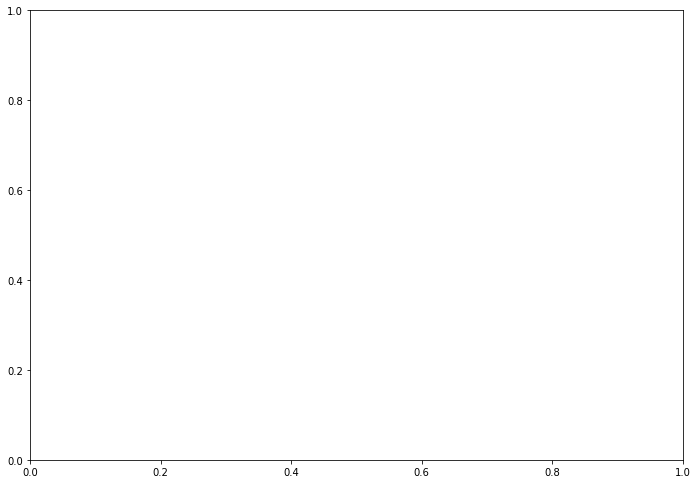

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'AKT3-T447')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'AKT3-T447', jitter = True, color = '.3')
plt.show()